#Question-1
Part -1 (Simple Linear Regression)
Question 1:
Download the dataset
1. Print the head of the data frame.
2. Analyze the data by looking at the data types.
3. Create plots to understand more about the distribution.
4. Separate the dependent and the independent variables and store them in newly defined
variables.
5. Split the data into 25% test and 75% train.
6. re-shape the data since there is only one dependent and one independent variable,
whereas the model.fit and model.predict functions always expect a 2-D array.
7. Train the linear regression model and predict the values for test set data.
8. Evaluate the built model using root mean squared error R2 score.


     X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
None


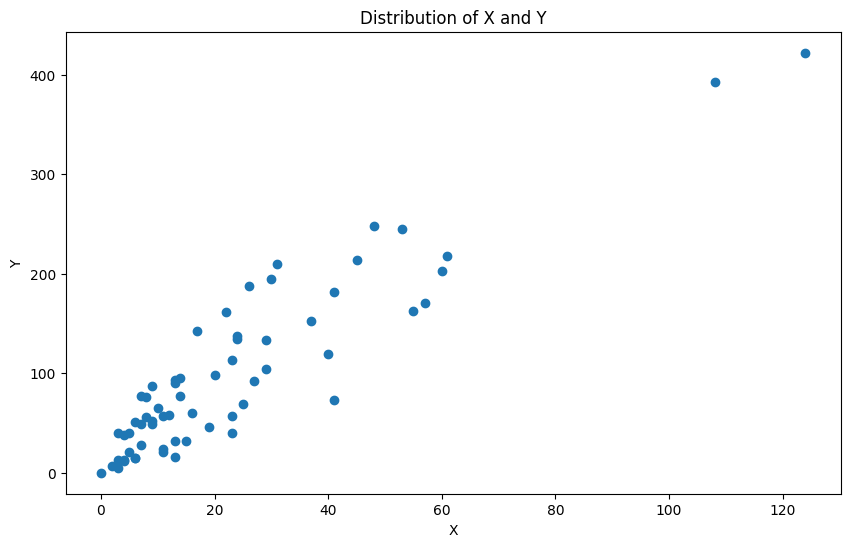

Root Mean Squared Error: 1232.8485112665066
R2 Score: 0.8480051329208175


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1
url = "https://raw.githubusercontent.com/gauraviiita/Supervised_ML/main/Datasets/Chapter_2/swedish_insurance.csv"
df = pd.read_csv(url)
print(df.head())
# 2
print(df.info())
# 3
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'])
plt.title('Distribution of X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 4
X = df[['X']]
y = df['Y']

# 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 6
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values
y_test = y_test.values

# 7
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 8
rmse = np.sqr(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")


#Question-2
(Multiple linear regression)
Question 2:
Download the given dataset. This data input features Hours Studied, Previous Scores,
Extracurricular Activities, Sleep Hours, and Sample Question Papers Practiced. The
corresponding output feature is the Performance Index. Write a Python program to perform the
following tasks.
1. Exploring the data, cleaning it if required, and printing the head of the data.
2. Apply the preprocessing techniques for object columns.
3. Create plots to understand more about the distribution.
4. Separate the dependent and the independent variables and store them in newly defined
variables.
5. Split the data into 30% test and 70% train.
6. Train the linear regression model and predict the values for test set data.
7. Evaluate the built model using root mean squared error R2 score.


Head of the Data:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


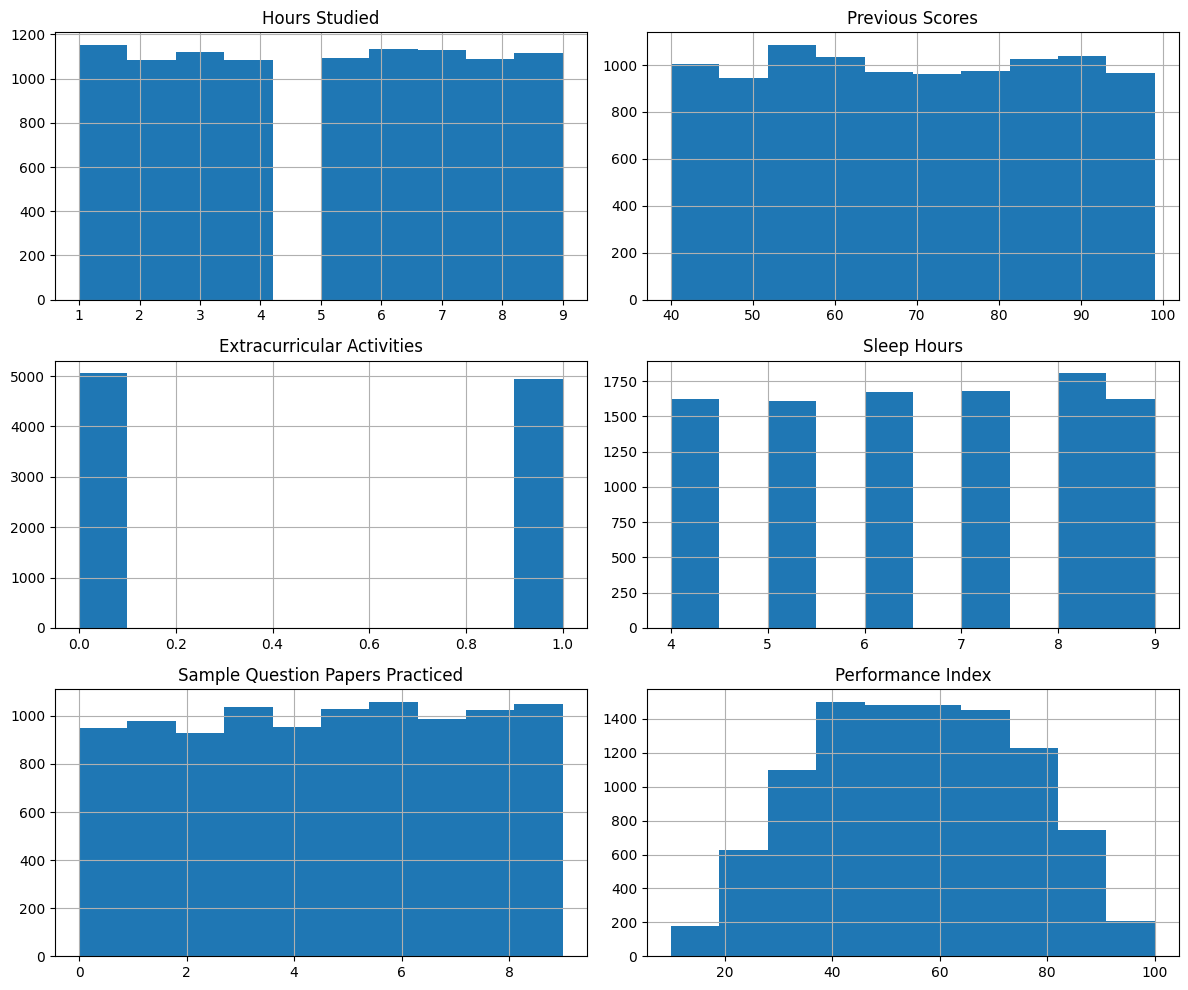

Root Mean Squared Error (RMSE): 2.02
R-squared (R2) Score: 0.99


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Load and Explore the Data
url = "https://raw.githubusercontent.com/gauraviiita/Supervised_ML/main/Datasets/MLR_datasets/Student_Performance.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataframe
print("Head of the Data:")
print(df.head())

# Step 2: Preprocessing for Object Columns
# Identify and label encode object columns (assuming 'Extracurricular Activities' and 'Sample Question Papers Practiced' are object columns)
label_encoder = LabelEncoder()
df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])
df['Sample Question Papers Practiced'] = label_encoder.fit_transform(df['Sample Question Papers Practiced'])

# Step 3: Create Plots to Understand Distribution
# Plotting histograms for numerical columns
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Step 4: Separate Dependent (Target) and Independent Variables
X = df.drop('Performance Index', axis=1)  # Independent variables
y = df['Performance Index']  # Dependent variable

# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


#Question-3
Part 2 (Binary Logistic Regression)
Question 3:
Download the given dataset. Write a Python program to perform the following tasks.
1. Print the basic dataset information such as head, statistics and data info.
2. Create box plots to understand how different attributes are distributed for the Outcome
variable.
3. Create pair plots of selected columns such as 'Glucose', 'Age',
'DiabetesPedigreeFunction', 'BMI', ' Insulin', 'SkinThickness', and 'Blood Pressure'.
4. Split the data into training and test data and fit our training data to a logistic regression
model.
5. Create a confusion matrix.



Dataset Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.3

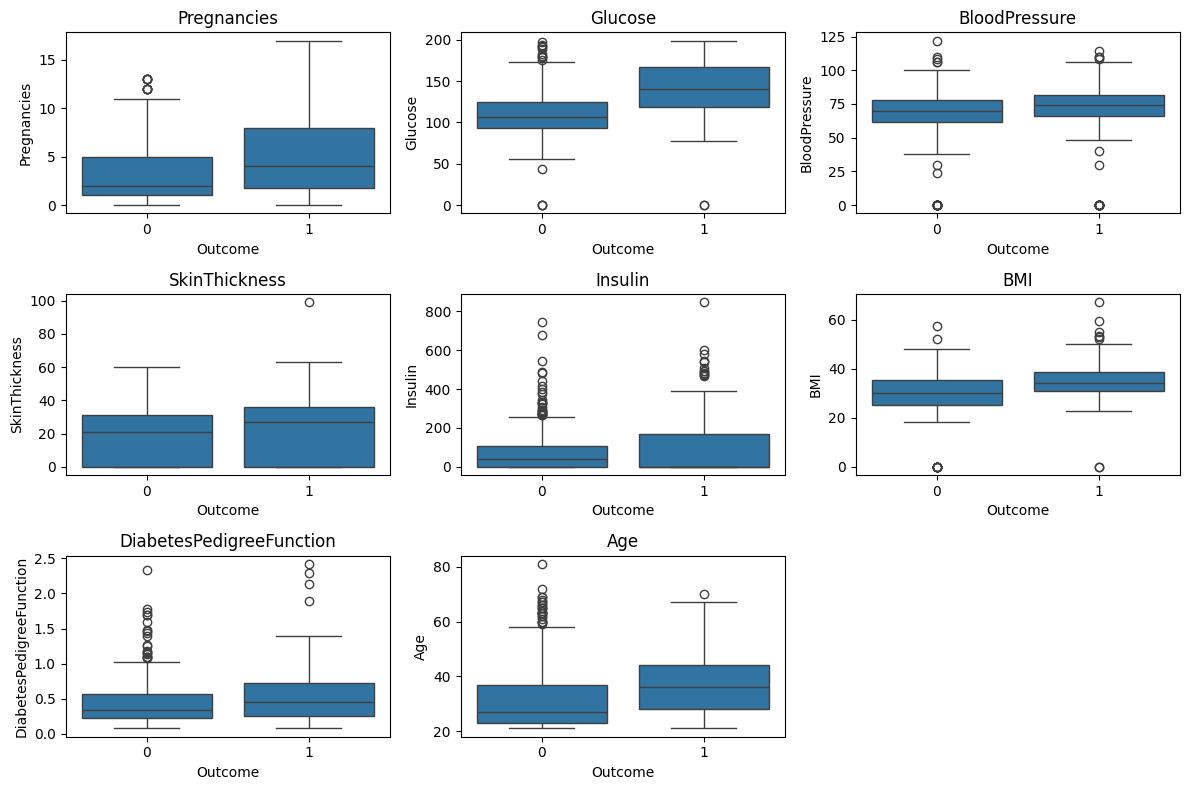

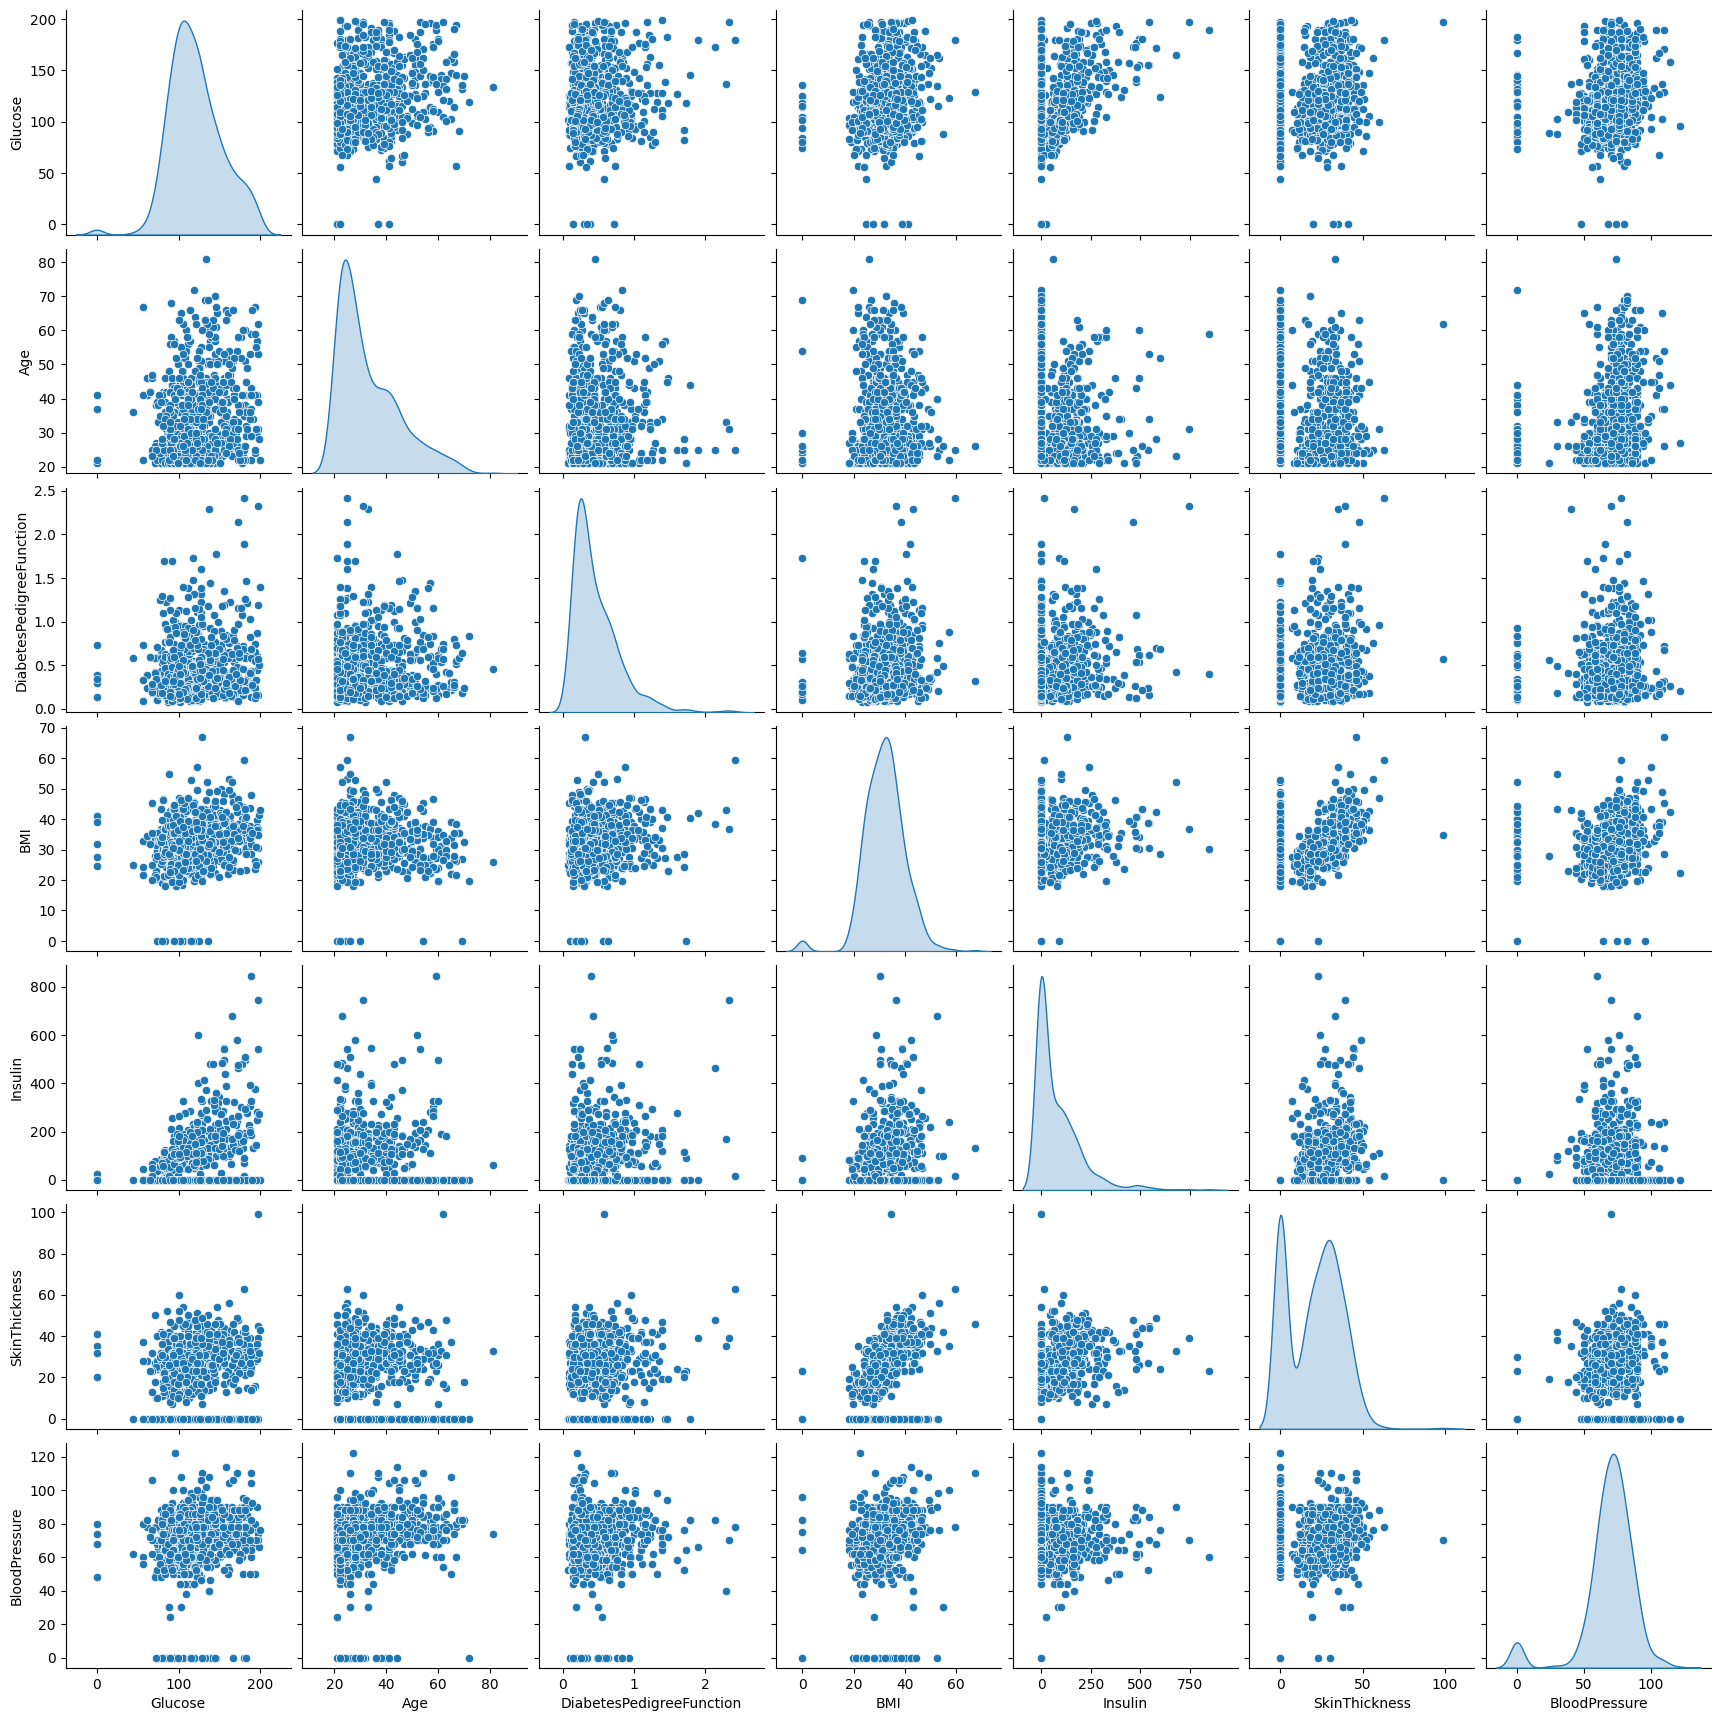

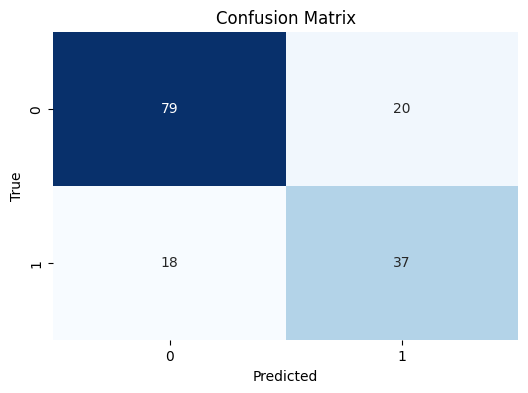

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset and print basic information
url = "https://raw.githubusercontent.com/gauraviiita/Supervised_ML/main/Datasets/logistic_regression/diabetes.csv"
df = pd.read_csv(url)

print("Dataset Head:")
print(df.head())

print("\nDataset Statistics:")
print(df.describe())

print("\nDataset Information:")
print(df.info())

# Step 2: Create box plots to understand attribute distributions for Outcome variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

# Step 3: Create pair plots of selected columns
selected_columns = ['Glucose', 'Age', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 'SkinThickness', 'BloodPressure']
sns.pairplot(df[selected_columns], diag_kind='kde')
plt.show()

# Step 4: Split data into training and test sets, and fit logistic regression model
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Create confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#question-4
(Multinomial Logistic Regression)
Question 4:
Download the given dataset.
1. Print the basic dataset information such as head, statistics and data info.
2. Apply the preprocessing techniques to convert the target columns into numerical
columns.
3. Create pair plots for input features.
4. Split the data into training and test data and fit our training data to a logistic regression
model.
5. Create a confusion matrix and accuracy score

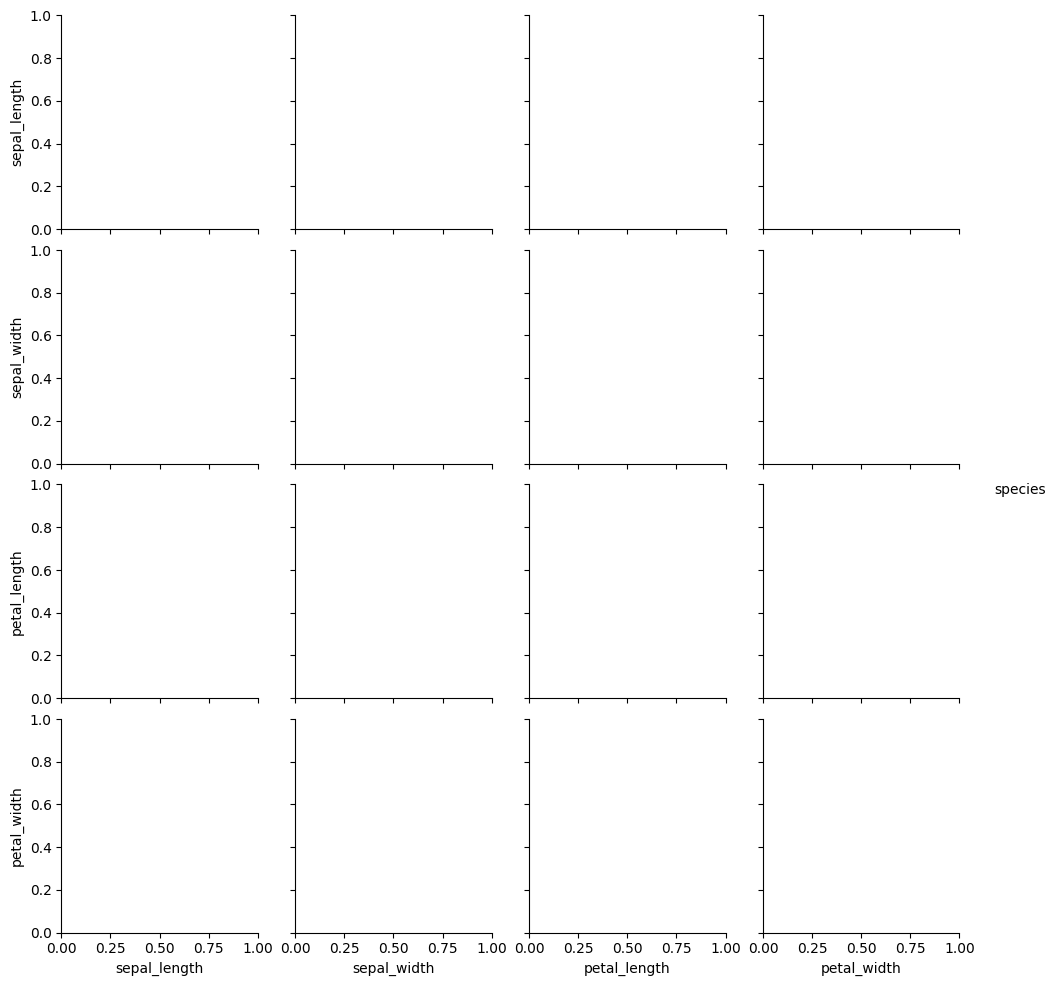

ValueError: Input y contains NaN.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
url = "https://github.com/gauraviiita/Supervised_ML/raw/main/Datasets/logistic_regression/Iris%20Dataset.csv"
iris_df = pd.read_csv(url)

# Map species to numerical values
species_mapping = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
iris_df['species'] = iris_df['species'].map(species_mapping)

# Create pair plots
sns.pairplot(iris_df, hue='species')
plt.show()

# Split data into features (X) and target (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy score
acc_score = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", acc_score)
